<a href="https://colab.research.google.com/github/lmencisoe/seguros/blob/main/Modelo_seguros_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pandas_profiling import ProfileReport
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import joblib
from google.colab import drive
drive.mount('/content/drive')
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score, auc
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import seaborn as sns
import warnings
import re
warnings.filterwarnings('ignore')

Mounted at /content/drive


# **Lectura de datos**

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/lmencisoe/seguros/main/seguros.csv",sep=";")

In [3]:
df.head()

,ACTECON,GRUANALI,anti,TAMAEMP,nrotrab,riesgo,categoria,lineanegocio,modular,producto,fechainicio,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,24,4,10,2,37,2,4,1,1,3,2022-01-07T00:00:00.0000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,24,4,10,2,37,2,4,1,2,3,2021-12-26T00:00:00.0000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24,4,10,2,37,2,4,1,2,3,2021-12-11T00:00:00.0000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,24,4,10,2,37,2,4,1,2,3,2021-04-19T00:00:00.0000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,24,4,10,2,37,2,4,1,2,3,2021-09-15T00:00:00.0000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df2 = df.copy()
df2 = df[['ACTECON',	'GRUANALI',	'anti',	'TAMAEMP',	'nrotrab',	'riesgo',	'categoria',	'lineanegocio',	'modular',	'producto'	]]
#df2 = df2.drop_duplicates()
#df2

# **Definición de X y Y**

In [10]:
X_total = df2.drop(['producto'], axis=1)
df2['target'] = df2['producto']
Y_total = df2['target'].astype(float)

# **Split de train y test**

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_total, Y_total, test_size=0.2, random_state=2022)

# **Matriz de correlaciones**

<Axes: >

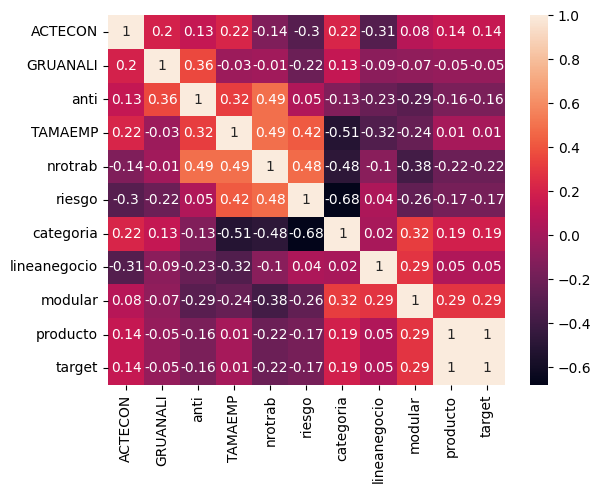

In [12]:
matriz_correlacion = df2.corr().round(2)
sns.heatmap(data=matriz_correlacion, annot=True)


# **Accuracy de KNN**

In [13]:

def CalculandoAccuracy (k:int) -> int:
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.metrics import accuracy_score
  scikit_knnc = KNeighborsClassifier(n_neighbors=k)
  scikit_knnc.fit(X_train, y_train)
  accuracy = scikit_knnc.score(X_test, y_test)
  return accuracy

for i in range(3, 40):
  print ("Para el valor de: ",i,"El Accuracy es:", CalculandoAccuracy(i))


Para el valor de:  3 El Accuracy es: 0.9085106382978724
Para el valor de:  4 El Accuracy es: 0.9031914893617021
Para el valor de:  5 El Accuracy es: 0.8971631205673759
Para el valor de:  6 El Accuracy es: 0.8943262411347518
Para el valor de:  7 El Accuracy es: 0.8918439716312057
Para el valor de:  8 El Accuracy es: 0.8879432624113475
Para el valor de:  9 El Accuracy es: 0.8875886524822695
Para el valor de:  10 El Accuracy es: 0.8890070921985815
Para el valor de:  11 El Accuracy es: 0.8875886524822695
Para el valor de:  12 El Accuracy es: 0.8865248226950354
Para el valor de:  13 El Accuracy es: 0.8854609929078014
Para el valor de:  14 El Accuracy es: 0.8833333333333333
Para el valor de:  15 El Accuracy es: 0.8812056737588653
Para el valor de:  16 El Accuracy es: 0.8801418439716312
Para el valor de:  17 El Accuracy es: 0.8765957446808511
Para el valor de:  18 El Accuracy es: 0.8773049645390071
Para el valor de:  19 El Accuracy es: 0.8776595744680851
Para el valor de:  20 El Accuracy es: 

# **Pipeline de transformmación numérica y categórica**

In [14]:
cat_features = X_total.select_dtypes(exclude=["float64", "int64"]).columns.to_list()
numeric_features = X_total.select_dtypes(["float64", "int64"]).columns.to_list()

categorical_transformer = Pipeline(
            steps=[
                ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                ('encoder', OneHotEncoder())
            ]
        )    

numeric_transformer = Pipeline(
            steps=[
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('scaler', StandardScaler())
            ]
        )

preprocessor = ColumnTransformer(
            transformers=[
                ('numerical', numeric_transformer, numeric_features),
                ('categorical', categorical_transformer, cat_features)
            ]
        )

***Pipeline de XGBoost***


In [15]:

xgb_pipeline = Pipeline(
            [
                ("preprocessor", preprocessor),
                (
                    "classifier", XGBClassifier(),
                ),
            ]
        )
     

In [20]:

xgb_param_grid = {
    'classifier__learning_rate': np.arange(0.05, 0.5, 0.05),
    'classifier__max_depth': np.arange(2, 5, 1),
    'classifier__n_estimators': np.arange(2, 5, 1),
    'classifier__subsample': np.arange(0.05, 0.5, 0.05)
}

randomized_roc_auc_xgb = RandomizedSearchCV(estimator=xgb_pipeline, 
                                            param_distributions=xgb_param_grid,
                                            n_iter=50,
                                            #scoring='roc_auc',
                                            cv=3, 
                                            verbose=1)

with tf.device('/device:GPU:0'): 
  randomized_roc_auc_xgb.fit(X_train, y_train)

print('Best AUC: ', randomized_roc_auc_xgb.best_score_)
#print('Estimator: ', randomized_roc_auc.best_estimator_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best AUC:  0.9412908044995718


*Classification report de train*

In [22]:
y_pred_train = randomized_roc_auc_xgb.predict(X_train)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

         0.0       0.52      0.12      0.20       100
         1.0       0.70      0.68      0.69        88
         2.0       0.80      0.92      0.85        48
         3.0       0.58      0.65      0.61       312
         4.0       1.00      1.00      1.00      7544
         5.0       0.99      0.94      0.96      2150
         6.0       0.74      0.94      0.83       431
         7.0       0.66      0.86      0.75       405
         8.0       0.83      0.19      0.30        27
         9.0       0.57      0.41      0.47       103
        10.0       0.73      0.12      0.20        68

    accuracy                           0.95     11276
   macro avg       0.74      0.62      0.62     11276
weighted avg       0.95      0.95      0.95     11276



*Classification report de train*

In [24]:
y_pred_test = randomized_roc_auc_xgb.predict(X_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.50      0.13      0.21        30
         1.0       0.84      0.59      0.70        27
         2.0       0.67      0.89      0.76         9
         3.0       0.46      0.53      0.49        77
         4.0       1.00      1.00      1.00      1902
         5.0       0.98      0.93      0.95       534
         6.0       0.66      0.89      0.76        94
         7.0       0.59      0.82      0.68        94
         8.0       0.50      0.29      0.36         7
         9.0       0.44      0.30      0.36        27
        10.0       0.67      0.21      0.32        19

    accuracy                           0.94      2820
   macro avg       0.66      0.60      0.60      2820
weighted avg       0.94      0.94      0.93      2820



***Pipeline de Decision Tree***


In [25]:

dt_pipeline = Pipeline(
            [
                ("preprocessor", preprocessor),
                (
                    "classifier", DecisionTreeClassifier(),
                ),
            ]
        )

In [27]:

dt_param_grid = {
    'classifier__max_depth': np.arange(3, 10, 1),
    'classifier__max_features': ['auto', 'sqrt', 'log2'],
    'classifier__min_samples_split': np.arange(5, 50, 5)
}

# Perform RandomizedSearchCV
randomized_roc_auc_dt = RandomizedSearchCV(estimator= dt_pipeline, 
                                            param_distributions=dt_param_grid,
                                            n_iter=50,
                                            #scoring='roc_auc',
                                            cv=3, 
                                            verbose=1)

# Fit the estimator
with tf.device('/device:GPU:0'): 
  randomized_roc_auc_dt.fit(X_train, y_train)

# Compute metrics
print('Best AUC: ', randomized_roc_auc_dt.best_score_)
#print('Estimator: ', randomized_roc_auc.best_estimator_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best AUC:  0.9348177820100662


*Classification report de train*

In [30]:
y_pred_train = randomized_roc_auc_dt.predict(X_train)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

         0.0       0.50      0.26      0.34       100
         1.0       0.78      0.59      0.67        88
         2.0       0.78      0.73      0.75        48
         3.0       0.54      0.60      0.57       312
         4.0       0.99      0.99      0.99      7544
         5.0       0.98      0.96      0.97      2150
         6.0       0.74      0.90      0.81       431
         7.0       0.67      0.83      0.74       405
         8.0       0.62      0.59      0.60        27
         9.0       0.66      0.39      0.49       103
        10.0       0.67      0.21      0.31        68

    accuracy                           0.94     11276
   macro avg       0.72      0.64      0.66     11276
weighted avg       0.94      0.94      0.94     11276



*Classification report de test*

In [31]:
y_pred_test = randomized_roc_auc_dt.predict(X_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.33      0.17      0.22        30
         1.0       0.75      0.44      0.56        27
         2.0       0.67      0.44      0.53         9
         3.0       0.37      0.48      0.42        77
         4.0       0.99      0.99      0.99      1902
         5.0       0.96      0.93      0.94       534
         6.0       0.60      0.79      0.68        94
         7.0       0.56      0.70      0.63        94
         8.0       0.50      0.43      0.46         7
         9.0       0.25      0.11      0.15        27
        10.0       0.73      0.42      0.53        19

    accuracy                           0.92      2820
   macro avg       0.61      0.54      0.56      2820
weighted avg       0.92      0.92      0.92      2820

